<a href="https://colab.research.google.com/github/anujsahani01/PyLoomer/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install datasets
! pip install huggingface_hub
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.3 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Your token has been saved in your

In [4]:
from datasets import load_dataset

# If the dataset is gated/private, make sure you have run huggingface-cli login
dataset = load_dataset("anujsahani01/Custom_Dataset_CodeGen" , use_auth_token = True)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:2089: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=True' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text_prompt', 'code_prompt'],
        num_rows: 178487
    })
    validation: Dataset({
        features: ['text_prompt', 'code_prompt'],
        num_rows: 59496
    })
    test: Dataset({
        features: ['text_prompt', 'code_prompt'],
        num_rows: 59496
    })
})

In [14]:
train_prompts = dataset['train']['text_prompt']
test_prompts = dataset['test']['text_prompt']
validation_prompts = dataset['validation']['text_prompt']

train_code = dataset['train']['code_prompt']
test_code = dataset['test']['code_prompt']
validation_code = dataset['validation']['code_prompt']

print(len(train_prompts) == len(train_code))
print(len(test_prompts) == len(test_code))
print(len(validation_prompts) == len(validation_code))
print('----------------------------------------------')
print(None in train_prompts)
print(None in test_prompts)
print(None in validation_prompts)
print(None in train_code)
print(None in test_code)
print(None in validation_code)

True
True
True
----------------------------------------------
False
False
True
True
False
True


In [15]:
train_prompts = dataset['train']['text_prompt']
test_prompts = dataset['test']['text_prompt']
validation_prompts = dataset['validation']['text_prompt']

train_code = dataset['train']['code_prompt']
test_code = dataset['test']['code_prompt']
validation_code = dataset['validation']['code_prompt']

final_train_prompts = []
final_test_prompts = []
final_validation_prompts = []

final_train_code = []
final_test_code = []
final_validation_code = []

if None in train_prompts or None in train_code:
    for i in range(len(train_prompts)):
        if train_prompts[i] is not None and train_code[i] is not None:
            final_train_prompts.append(train_prompts[i])
            final_train_code.append(train_code[i])
else:
    final_train_prompts = train_prompts
    final_train_code = train_code

if None in test_prompts or None in test_code:
    for i in range(len(test_prompts)):
        if test_prompts[i] is not None and test_code[i] is not None:
            final_test_prompts.append(test_prompts[i])
            final_test_code.append(test_code[i])
else:
    final_test_prompts = test_prompts
    final_test_code = test_code

if None in validation_prompts or None in validation_code:
    for i in range(len(validation_prompts)):
        if validation_prompts[i] is not None and validation_code[i] is not None:
            final_validation_prompts.append(validation_prompts[i])
            final_validation_code.append(validation_code[i])
else:
    final_validation_prompts = validation_prompts
    final_validation_code = validation_code


In [16]:
print(None in final_train_prompts)
print(None in final_test_prompts)
print(None in final_validation_prompts)
print(None in final_train_code)
print(None in final_test_code)
print(None in final_validation_code)

False
False
False
False
False
False


In [18]:
import pandas as pd
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_val = pd.DataFrame()

df_train['text_prompt'] = final_train_prompts
df_train['code_prompt'] = final_train_code
df_test['text_prompt'] = final_test_prompts
df_test['code_prompt'] = final_test_code
df_val['text_prompt'] = final_validation_prompts
df_val['code_prompt'] = final_validation_code

In [19]:
from datasets import DatasetDict, Dataset

dataset = DatasetDict({
    'train' :  Dataset.from_pandas(df_train),
    'test' :  Dataset.from_pandas(df_test),
    'validation' :  Dataset.from_pandas(df_val)
})

In [20]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text_prompt', 'code_prompt'],
        num_rows: 178484
    })
    test: Dataset({
        features: ['text_prompt', 'code_prompt'],
        num_rows: 59496
    })
    validation: Dataset({
        features: ['text_prompt', 'code_prompt'],
        num_rows: 59495
    })
})

In [21]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

# special tokens for prompting
system_token = "<SYSTEM_TASK:>"
user_token = "<USER_TASK:>"
assistant_token = "<ASSISTANT_TASK:>"
end_token = "<END_TASK>"


tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-350M-mono",
                                          additional_special_tokens = ["<SYSTEM_TASK:>", "<USER_TASK:>", "<ASSISTANT_TASK:>", "<END_TASK>"],
                                          pad_token = "<PAD>",
                                          )

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [23]:
tokenizer

CodeGenTokenizerFast(name_or_path='Salesforce/codegen-350M-mono', vocab_size=50257, model_max_length=2048, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<PAD>', 'additional_special_tokens': ['<SYSTEM_TASK:>', '<USER_TASK:>', '<ASSISTANT_TASK:>', '<END_TASK>']}, clean_up_tokenization_spaces=True)

In [24]:
special_token_dict = tokenizer.special_tokens_map
print(special_token_dict)

{'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<PAD>', 'additional_special_tokens': ['<SYSTEM_TASK:>', '<USER_TASK:>', '<ASSISTANT_TASK:>', '<END_TASK>']}


In [25]:
tokenizer.add_special_tokens(special_token_dict)


0

In [26]:
def dataset_LM(data):
    final = data['text_prompt'] + '\n' + data['code_prompt']
    return{
        'final_input' : final
    }

LM_final_dataset = dataset.map(dataset_LM, batched = False, remove_columns = dataset['train'].column_names)

LM_final_dataset

Map:   0%|          | 0/178484 [00:00<?, ? examples/s]

Map:   0%|          | 0/59496 [00:00<?, ? examples/s]

Map:   0%|          | 0/59495 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['final_input'],
        num_rows: 178484
    })
    test: Dataset({
        features: ['final_input'],
        num_rows: 59496
    })
    validation: Dataset({
        features: ['final_input'],
        num_rows: 59495
    })
})

In [30]:
def tokenize(data):
    return tokenizer(data['final_input'], return_length = True)
tokenized_dataset = LM_final_dataset.map(tokenize, batched = True, remove_columns = LM_final_dataset['train'].column_names)

Map:   0%|          | 0/178484 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2131 > 2048). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/59496 [00:00<?, ? examples/s]

Map:   0%|          | 0/59495 [00:00<?, ? examples/s]

In [31]:
# def tokenize(data):
#   if data['text_prompt'] is not None and data['code_prompt'] is not None:
#     prompt = tokenizer(data['text_prompt'], return_length = True)
#     inp_ids = []
#     inp_len = []
#     if prompt['length'][0] != 0:
#       for length, ids in zip(prompt["length"], prompt["input_ids"]):
#         inp_ids.append(ids)
#         inp_len.append(length)
#       code = tokenizer(data['code_prompt'], return_length = True)
#       label = []
#       label_len = []
#       for length, lb in zip(code["length"], code["input_ids"]):
#         label.append(lb)
#         label_len.append(int(length))
#     else:
#       inp_ids = []
#       label = []
#       inp_len = 0
#       label_len = 0
#     return {"input_ids": inp_ids,
#             'labels' : label,
#             'input_length' : inp_len,
#             'code_length' : label_len}

In [32]:
# tokenized_data = dataset.map(tokenize , batched = True, remove_columns = ['code_prompt', 'text_prompt'])

In [33]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'length'],
        num_rows: 178484
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'length'],
        num_rows: 59496
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'length'],
        num_rows: 59495
    })
})

In [34]:
import statistics
import numpy as np
print('Minimum:', np.min(tokenized_dataset['train']['length']), 'Maximum: ' , np.max(tokenized_dataset['train']['length']), 'Mean: ', np.mean(tokenized_dataset['train']['length']), 'Mode:' , statistics.mode(tokenized_dataset['train']['length']))

Minimum: 42 Maximum:  5957 Mean:  267.1286557898747 Mode: 131


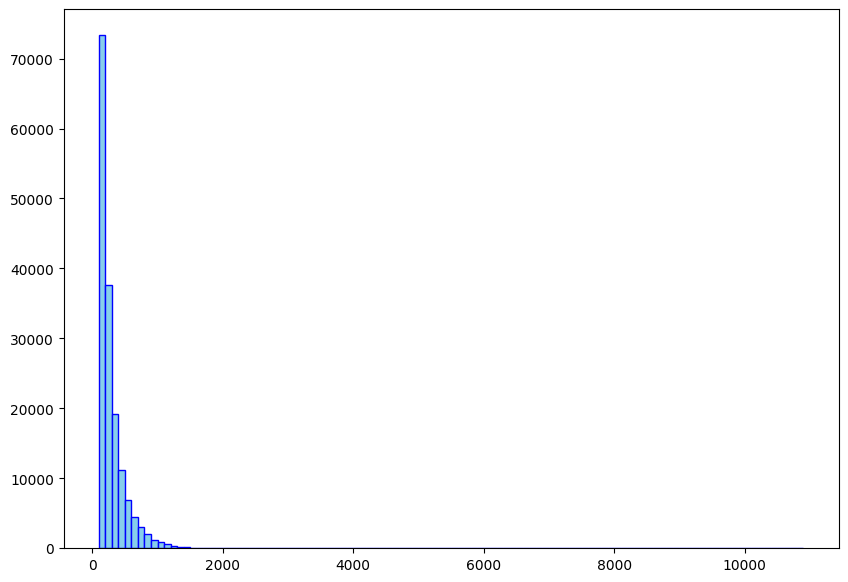

In [35]:
import matplotlib.pyplot as plt

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(tokenized_dataset['train']['length'], bins =[i for i in range(100, 11000, 100)], color = "skyblue", ec="blue")

# Show plot
plt.show()

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

all_tokens = []

text_tokens = np.concatenate(tokenized_dataset['train']['input_ids'])

# Count token frequencies
token_counter = Counter(text_tokens)

# Sort tokens by frequency in descending order
sorted_tokens = sorted(token_counter.items(), key=lambda x: x[1], reverse=True)

# Extract token and frequency for plotting
tokens, frequencies = zip(*sorted_tokens)

In [37]:
words = []
for i in range(100):
  words.append(tokenizer.decode(tokens[i]))

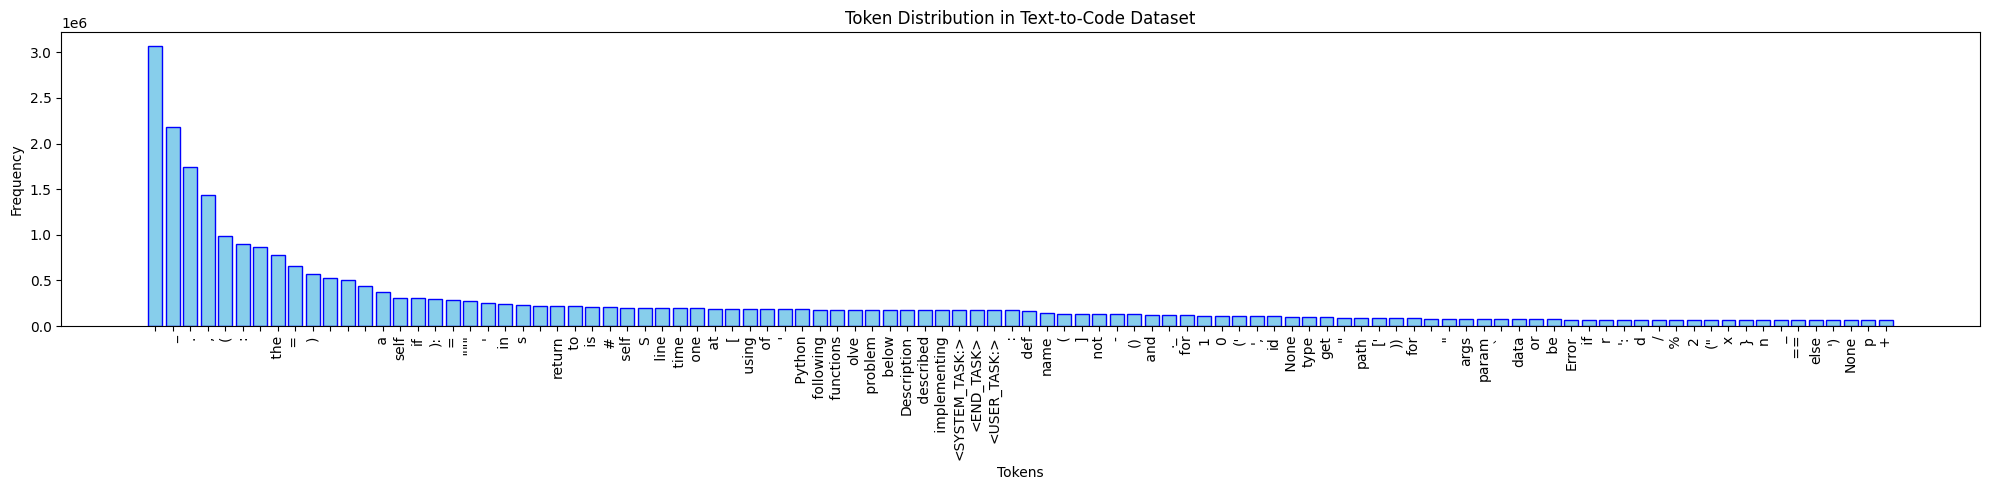

In [38]:
# Plot token distribution
plt.figure(figsize=(20, 5))
plt.bar(range(len(tokens[:100])), frequencies[:100], tick_label=words, color = "skyblue", ec="blue")
plt.xticks(rotation=90)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Token Distribution in Text-to-Code Dataset')
plt.tight_layout()
plt.show()